In [1]:
import pandas as pd
from transformers import AutoTokenizer

/iris/u/nathu/un_camels/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_json('/iris/u/nathu/un_camels/data/nyt/qa_pretrain_val_split.json')

In [7]:
tokenizer = AutoTokenizer.from_pretrained('gpt2')

In [6]:
df['document_len (paragraphs)'] = df['text'].apply(lambda x: len(x) if isinstance(x, list) else 1)
df['document_len (toks)'] = df['merged_text'].apply(lambda x: len(tokenizer.encode(x)))

Token indices sequence length is longer than the specified maximum sequence length for this model (1973 > 1024). Running this sequence through the model will result in indexing errors


In [19]:
df.describe(percentiles=[.01, .05, .1,  .25, .5, .75, .9, .95, .99])[['document_len (toks)',	'document_len (paragraphs)']]

,document_len (toks),document_len (paragraphs)
count,20479.000000,20479.000000
mean,842.836711,15.844524
std,780.995317,46.014652
min,90.000000,2.000000
1%,124.000000,2.000000
5%,162.000000,2.000000
10%,197.000000,3.000000
25%,306.000000,6.000000
50%,694.000000,12.000000
75%,1151.000000,19.000000


In [26]:
df[df['document_len (toks)'] > 10000]

,title,date,text,doc_id,year,merged_text,document_len (paragraphs),document_len (toks)
967121,Transcript of the Debate on TV Between Bentsen...,1988-10-06,[LEAD: Participants in the Debate CANDIDATES...,185645,1988,LEAD: Participants in the Debate CANDIDATES:...,255,18316
964799,Highlights of the Season,1988-10-09,[LEAD: The opening of a new Jewish museum in F...,186572,1988,LEAD: The opening of a new Jewish museum in Fr...,96,14451
960306,Transcript of the Second Debate Between Bush a...,1988-10-14,[LEAD: PARTICIPANTS IN THE DEBATE CANDIDATES...,187841,1988,LEAD: PARTICIPANTS IN THE DEBATE CANDIDATES:...,340,19802
962201,Open Positions on Short Sales Are Up 3.2% on B...,1988-10-21,[LEAD: The New York Stock Exchange reported ye...,189858,1988,LEAD: The New York Stock Exchange reported yes...,2426,12120
963411,Over-the-Counter Short Sales Rose 8.4% in Month,1988-10-26,[LEAD: The National Association of Securities ...,191711,1988,LEAD: The National Association of Securities D...,2477,13141
978837,Results District by District: Winners in the R...,1988-11-10,[LEAD: WEST ALASKA At-Large - 97 percent G...,196499,1988,LEAD: WEST ALASKA At-Large - 97 percent Gr...,2,12341
982275,WHAT'S NEW: MORE QUAD LIFTS AND CONDOS,1988-11-13,"[LEAD: THE NORTHEAST MAINE, SADDLEBACK Rang...",197893,1988,LEAD: THE NORTHEAST MAINE\nSADDLEBACK Range...,113,13457
983867,Open Short-Sales Positions Up 3.4% on Big Board,1988-11-22,[LEAD: The New York Stock Exchange yesterday r...,200666,1988,LEAD: The New York Stock Exchange yesterday re...,2474,12250
981239,Open Positions on Short Sales Up 1% on Nasdaq,1988-11-26,[LEAD: The National Association of Securities ...,201568,1988,LEAD: The National Association of Securities D...,2573,13509
955164,NOTABLE BOOKS OF THE YEAR,1988-12-04,[LEAD: This list has been selected from books ...,203748,1988,LEAD: This list has been selected from books r...,234,17166


In [27]:
df.iloc[0]

title                        Review/Cabaret; Campy Female Impersonations by...
date                                                       1988-10-01 00:00:00
text                         [LEAD: Ranging from the high drama of B. D. Wo...
doc_id                                                                  184070
year                                                                      1988
merged_text                  LEAD: Ranging from the high drama of B. D. Won...
document_len (paragraphs)                                                    4
document_len (toks)                                                        464
Name: 966810, dtype: object

In [29]:
from tqdm import tqdm
para_lens = []
for text in tqdm(df['text']):
    for para in text:
        para_lens.append(len(tokenizer.encode(para)))

100%|██████████| 20479/20479 [00:40<00:00, 508.97it/s]


Text(0, 0.5, 'Density')

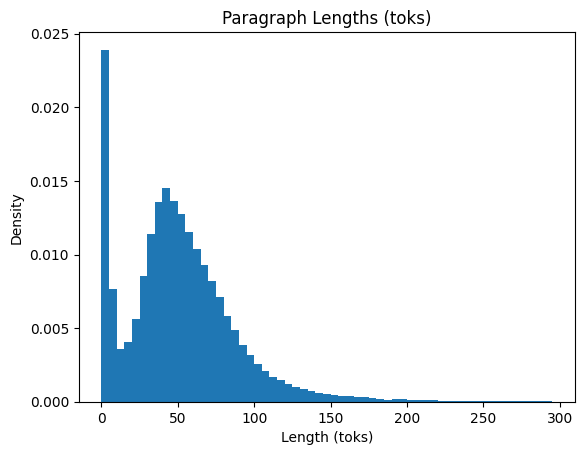

In [39]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(para_lens, bins=np.arange(0, 300, 5), density=True)
plt.title('Paragraph Lengths (toks)')
plt.xlabel('Length (toks)')
plt.ylabel('Density')

# Examine document matching

In [2]:
df = pd.read_csv('/iris/u/nathu/un_camels/data/nyt/meta_train_split_with_matches.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])
df['match_date'] = pd.to_datetime(df['match_date'])


In [4]:
df['text'] = df['merged_text']
df.drop(columns=['merged_text'], inplace=True)

In [5]:
df = df[df['match_score'] < 0.98]
df = df[df['match_title'] != df['title']]


NameError: name 'plt' is not defined

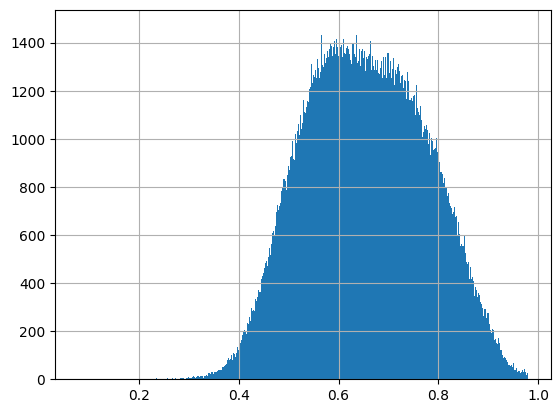

In [22]:
df['match_score'].hist(bins=500)
plt.title('Match Scores')
plt.xlabel('Score')
plt.ylabel('Count')

Text(0, 0.5, 'Frequence')

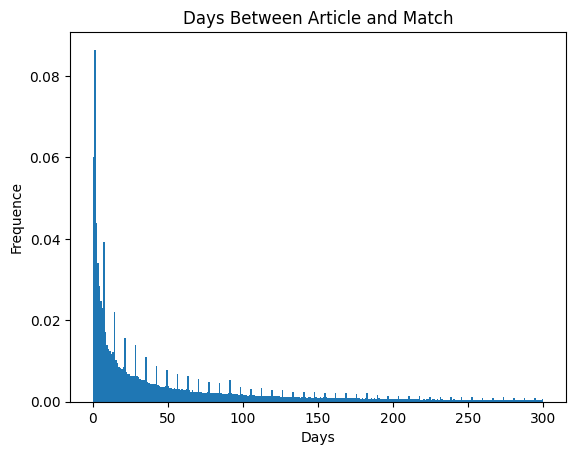

In [117]:
time_diffs = (df['match_date'] - df['date']).dt.days
plt.hist(time_diffs, cumulative=False, bins=np.linspace(0, 300, 301), density=True)
plt.title('Days Between Article and Match')
plt.xlabel('Days')
plt.ylabel('Frequence')

In [2]:
import torch
f = torch.nn.Softplus(beta = torch.log(2))
f(0)

KeyboardInterrupt: 

In [132]:
df[(df['match_score'] > 0.97)][['title', 'match_title', 'match_score', 'date', 'match_date', 'text', 'match_text']].sample(10)

,title,match_title,match_score,date,match_date,text,match_text
123595,"Dinkins to Hire 1,058 More Officers by Spring","Dinkins Plans Service Cuts to Pay For Adding 1,058 Police Officers",0.972603,1990-08-06,1990-08-07,"LEAD: In the face of stiff pressure to take action against rising crime in New York City, Mayor David N. Dinkins is to announce today that he will hire 1,058 new police officers by next spring to increase foot patrols in neighborhoods, a senior mayoral aide said last night.\nIn the face of stiff...","LEAD: Pressured to respond to a recent string of alarming crimes in New York City, Mayor David N. Dinkins said yesterday that he would hire 1,058 new police officers by next spring to increase neighborhood foot patrols and would pay for this by cutting a range of other services.\nPressured to re..."
200628,Yields Up on Tax-Exempt Money Funds,Money Fund Yields Are Mixed in Week,0.972753,1991-08-29,1991-09-05,"Yields of money market funds monitored by IBC/Donoghue's Money Fund Report were mixed for the week ended yesterday, with yields of tax-exempt funds rising as many usual buyers moved to longer maturities with higher yields.\nThe seven-day compounded average yield for tax-exempt funds rose 2 basis...","Yields of money market funds monitored by IBC/Donoghue's Money Fund Report were mixed for the second consecutive week in the period that ended yesterday.\nTax-exempt money fund yields moved up in the week because of a combination of more supply and less demand, as investors shifted to the higher..."
158028,"PAPERBACK BEST SELLERS: January 20, 1991","PAPERBACK BEST SELLERS: January 27, 1991",0.972648,1991-01-20,1991-01-27,"Weeks\nThis\nOn\nWeek\nList\nFiction\n1\n6\nDANCES WITH WOLVES, by Michael Blake. (Fawcett, $4.95.) A Civil War veteran, stationed in Sioux country, adopts the ways of the Indians and fights for their principles.\n2\n36\nTHE BONFIRE OF THE VANITIES, by Tom Wolfe. (Bantam, $5.95.) A bond trader c...","Weeks\nThis\nOn\nWeek\nList\nFiction\n1\n7\nDANCES WITH WOLVES, by Michael Blake. (Fawcett, $4.95.) A Civil War veteran, stationed in Sioux country, adopts the ways of the Indians.\n2\n3\nMYSTERY, by Peter Straub. (Signet, $5.95.) A bright young man and an elderly eccentric join hands to solve a..."
133495,U.S. Energy Options (and Habits),"Proposals for a U.S. Energy Policy: Some Possible, Most Not",0.972361,1990-09-24,1990-09-24,"LEAD: From the day Ronald Reagan arrived in Washington until just before Saddam Hussein's troops reached Kuwait City, energy policy was a fringe issue in the United States. Now, the deployment of American troops in the Persian Gulf has left many policy makers wondering whether the United States ...","LEAD: From the day Ronald Reagan arrived in Washington until the day before Saddam Hussein's troops reached Kuwait City, energy policy was a fringe issue in the United States. Now, the deployment of American troops in the Persian Gulf to assure a steady flow of oil has left many policy makers wo..."
45028,New Breed of Robots Have the Human Touch,Corrections,0.979142,1989-08-01,1989-08-09,"LEAD: An article in Science Times on Aug. 1 about new robots called teleoperators referred incorrectly to the views of John Molino, president of the Tech-U-Fit Corporation in Alexandria, Va. He said he believed the robots would assist, but not replace, shuttle crews working in space.\nAn article...","LEAD: An article in Science Times on Aug. 1 about new robots called teleoperators referred incorrectly to the views of John Molino, president of the Tech-U-Fit Corporation in Alexandria, Va. He said he believed the robots would assist, but not replace, shuttle crews working in space.\nAn article..."
154819,Woman Agrees to Sentence That Requires Birth Control,Woman in Abuse Case Agrees to Birth Control,0.975764,1991-01-04,1991-01-05,"A mother who pleaded guilty to child abuse has agreed to have a birth control device implanted under her arm as part of a sentence of probation.\nDarlene Johnson, who is

In [6]:
df.to_csv('/iris/u/nathu/un_camels/data/nyt/meta_train_split_with_matches_clean.json', index=False)